In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot, iplot, init_notebook_mode as py
import seaborn as sns
import plotly.graph_objs as go

#for standardising data
from sklearn.preprocessing import StandardScaler 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# chechking if there's any missing value in the data using bar plot
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    iplot(fig)
    


In [8]:
missing_plot(df, 'Class')

In [9]:
fraud_count = len(df[df.Class == 1])
none_fraud_count = len(df[df.Class == 0])


In [10]:

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are {}'.format(len(df)))
print('Number of Non-fraud cases are {}'.format(none_fraud_count))
print('Number of fraud cases are {}'.format(fraud_count))

print('Percentage of Non-fraud cases is {} % of total'.format((none_fraud_count/len(df['Class'])*100)))

print('Percentage of fraud cases is {} % of total'.format((fraud_count/len(df['Class'])*100)))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of fraud cases are 492
Percentage of Non-fraud cases is 99.82725143693798 % of total
Percentage of fraud cases is 0.1727485630620034 % of total


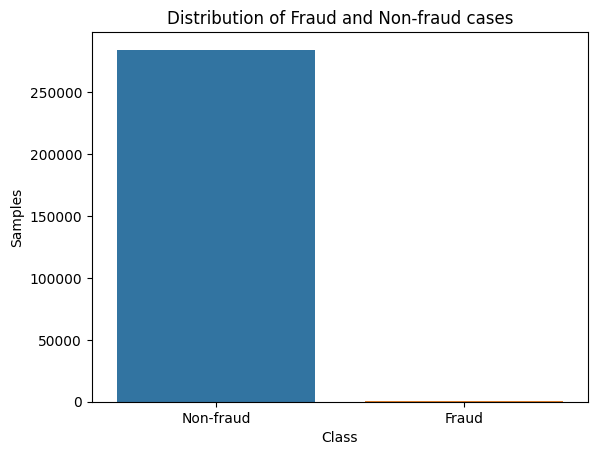

In [11]:
x = df.Class.value_counts()
sns.barplot(x=x.index, y=x.values)
plt.gca().set_ylabel('Samples')
plt.xticks(ticks=[0, 1], labels=['Non-fraud', 'Fraud'])
plt.title('Distribution of Fraud and Non-fraud cases')
plt.show()

In [12]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

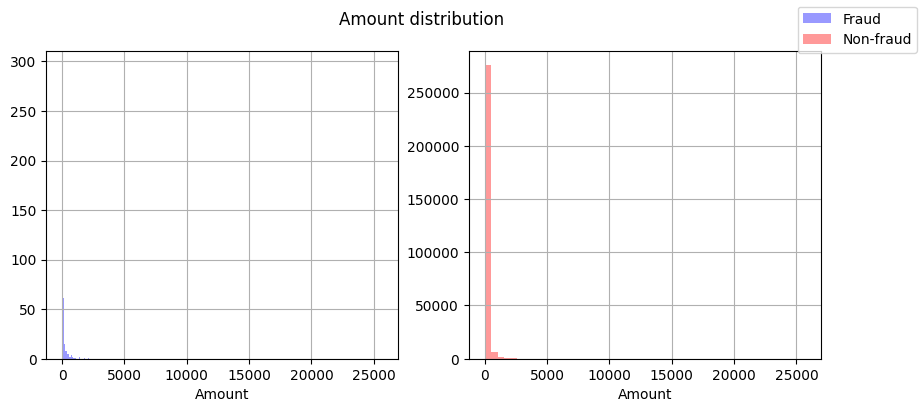

In [13]:
#Create visualization of the distribution of the amount in comparision to target feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10,4))
sns.distplot(df[(df['Class'] == 1)]['Amount'], ax=ax1, kde=False, color='blue',label='Fraud')
sns.distplot(df[(df['Class'] == 0)]['Amount'],ax=ax2, kde=False, color='red',label='Non-fraud');
f.suptitle('Amount distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
amount=df['Amount'].values
df['Amount'] = scaler.fit_transform(amount.reshape(-1, 1))

print(df['Amount'].head(10)) 

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [15]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [16]:
# Using SMOTE in order to deal with the imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter


In [17]:
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


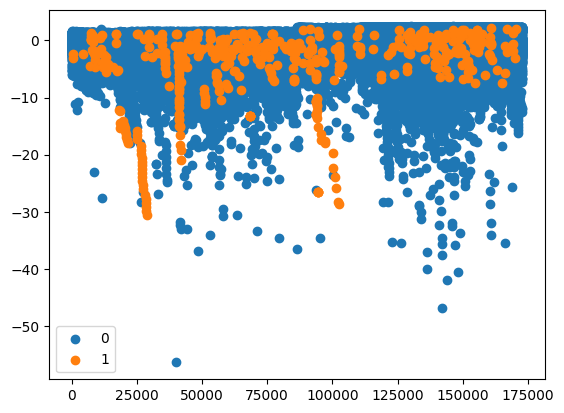

In [18]:
from numpy import where
from matplotlib import pyplot

# scatter plot of examples by class label
for label, _ in Counter(y_smote).items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score,f1_score,classification_report

In [20]:
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote ,test_size=test_size, random_state=seed)

In [21]:
model = XGBClassifier(learning_rate=0.1,      
    n_estimators=300,       
    subsample=0.8,         
    colsample_bytree=0.8,   
    gamma=0.1,              
    reg_alpha=0.1,          
    scale_pos_weight=99,   
    use_label_encoder=False, 
    eval_metric="auc"       )
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [23]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc*100)

prec = precision_score(y_test, predictions)
print("Precision:",prec * 100.0)

Accuracy: 99.9744201909959
Precision: 99.94889321876896


In [24]:
recall = recall_score(y_test, y_pred)
print("Recall : ",recall )

f1score = f1_score(y_test,y_pred, average='macro')
print("F1 Score : ",f1score )

Recall :  1.0
F1 Score :  0.9997442017551076


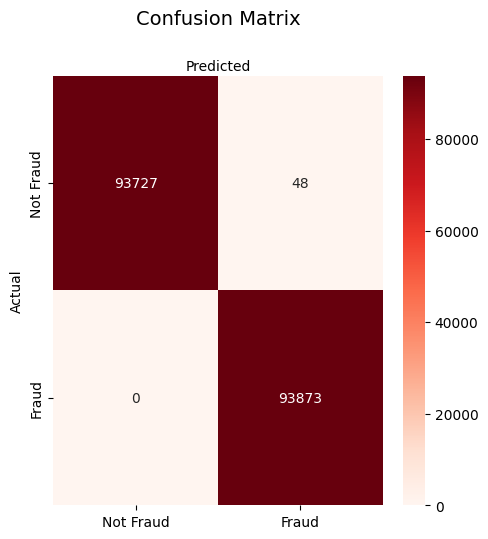

In [25]:
c_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Reds" ,fmt='g',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],)
ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1,fontsize=14)
plt.show()